<a href="https://colab.research.google.com/github/juniousnj/SPICE-2024/blob/main/Copy_of_waveheight_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
My_name = "Junior"

In [202]:
My_Age = "27"

In [203]:
!pip install statsmodels
!pip install pmdarima
!pip intall seaborn
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn import linear_model

from pandas import to_datetime
import datetime
from datetime import datetime
import pandas as pd
#import pmdarima as pm
import itertools
import warnings
import matplotlib.pyplot as plt
from matplotlib import pyplot

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


ERROR: unknown command "intall" - maybe you meant "install"


In [204]:
df1 = pd.read_csv("https://www.ndbc.noaa.gov/view_text_file.php?filename=41049h2017.txt.gz&dir=data/historical/stdmet/"
                  , delimiter= '\s+', index_col=False) # reading in the data

In [205]:
df_23= pd.read_csv("https://www.ndbc.noaa.gov/view_text_file.php?filename=41049h2023.txt.gz&dir=data/historical/stdmet/"
                  , delimiter= '\s+', index_col=False) # reading in the data
df_22= pd.read_csv("https://www.ndbc.noaa.gov/view_text_file.php?filename=41049h2022.txt.gz&dir=data/historical/stdmet/"
                  , delimiter= '\s+', index_col=False) # reading in the data
df_21= pd.read_csv("https://www.ndbc.noaa.gov/view_text_file.php?filename=41049h2021.txt.gz&dir=data/historical/stdmet/"
                  , delimiter= '\s+', index_col=False) # reading in the data
df_20= pd.read_csv("https://www.ndbc.noaa.gov/view_text_file.php?filename=41049h2020.txt.gz&dir=data/historical/stdmet/"
                  , delimiter= '\s+', index_col=False) # reading in the data

In [206]:
df_22.info() # looking at basic information about your variable


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52533 entries, 0 to 52532
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #YY     52533 non-null  object
 1   MM      52533 non-null  object
 2   DD      52533 non-null  object
 3   hh      52533 non-null  object
 4   mm      52533 non-null  object
 5   WDIR    52533 non-null  object
 6   WSPD    52533 non-null  object
 7   GST     52533 non-null  object
 8   WVHT    52533 non-null  object
 9   DPD     52533 non-null  object
 10  APD     52533 non-null  object
 11  MWD     52533 non-null  object
 12  PRES    52533 non-null  object
 13  ATMP    52533 non-null  object
 14  WTMP    52533 non-null  object
 15  DEWP    52533 non-null  object
 16  VIS     52533 non-null  object
 17  TIDE    52533 non-null  object
dtypes: object(18)
memory usage: 7.2+ MB


In [207]:
df_20.info() # looking at basic information about your variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52171 entries, 0 to 52170
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #YY     52171 non-null  object
 1   MM      52171 non-null  object
 2   DD      52171 non-null  object
 3   hh      52171 non-null  object
 4   mm      52171 non-null  object
 5   WDIR    52171 non-null  object
 6   WSPD    52171 non-null  object
 7   GST     52171 non-null  object
 8   WVHT    52171 non-null  object
 9   DPD     52171 non-null  object
 10  APD     52171 non-null  object
 11  MWD     52171 non-null  object
 12  PRES    52171 non-null  object
 13  ATMP    52171 non-null  object
 14  WTMP    52171 non-null  object
 15  DEWP    52171 non-null  object
 16  VIS     52171 non-null  object
 17  TIDE    52171 non-null  object
dtypes: object(18)
memory usage: 7.2+ MB


In [208]:
df_21.info() # looking at basic information about your variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51510 entries, 0 to 51509
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #YY     51510 non-null  object
 1   MM      51510 non-null  object
 2   DD      51510 non-null  object
 3   hh      51510 non-null  object
 4   mm      51510 non-null  object
 5   WDIR    51510 non-null  object
 6   WSPD    51510 non-null  object
 7   GST     51510 non-null  object
 8   WVHT    51510 non-null  object
 9   DPD     51510 non-null  object
 10  APD     51510 non-null  object
 11  MWD     51510 non-null  object
 12  PRES    51510 non-null  object
 13  ATMP    51510 non-null  object
 14  WTMP    51510 non-null  object
 15  DEWP    51510 non-null  object
 16  VIS     51510 non-null  object
 17  TIDE    51510 non-null  object
dtypes: object(18)
memory usage: 7.1+ MB


In [209]:
df_23.info() # looking at basic information about your variable


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #YY     52441 non-null  object
 1   MM      52441 non-null  object
 2   DD      52441 non-null  object
 3   hh      52441 non-null  object
 4   mm      52441 non-null  object
 5   WDIR    52441 non-null  object
 6   WSPD    52441 non-null  object
 7   GST     52441 non-null  object
 8   WVHT    52441 non-null  object
 9   DPD     52441 non-null  object
 10  APD     52441 non-null  object
 11  MWD     52441 non-null  object
 12  PRES    52441 non-null  object
 13  ATMP    52441 non-null  object
 14  WTMP    52441 non-null  object
 15  DEWP    52441 non-null  object
 16  VIS     52441 non-null  object
 17  TIDE    52441 non-null  object
dtypes: object(18)
memory usage: 7.2+ MB


In [210]:
df_22

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2022,01,01,00,00,285,5.8,7.1,99.00,99.00,99.00,999,1017.9,24.0,24.3,20.8,99.0,99.00
2,2022,01,01,00,10,286,6.1,7.4,99.00,99.00,99.00,999,1018.1,24.0,24.3,20.7,99.0,99.00
3,2022,01,01,00,20,289,6.7,8.1,99.00,99.00,99.00,999,1018.4,24.0,24.3,20.5,99.0,99.00
4,2022,01,01,00,30,287,6.8,8.7,99.00,99.00,99.00,999,1018.2,24.0,24.3,20.6,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52528,2022,12,31,23,10,78,7.0,9.0,1.94,7.69,6.01,86,1022.9,23.0,24.4,18.6,99.0,99.0
52529,2022,12,31,23,20,78,6.7,9.0,99.0,99.0,99.0,999,1023.0,23.0,24.4,18.5,99.0,99.0
52530,2022,12,31,23,30,75,6.8,8.7,99.0,99.0,99.0,999,1023.0,23.0,24.5,18.5,99.0,99.0
52531,2022,12,31,23,40,79,6.6,8.5,1.92,10.0,6.1,109,1023.1,23.1,24.4,18.5,99.0,99.0


In [211]:
df1.head() # looking at the first five rows of your data

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2016,12,31,23,50,54,8.6,10.5,3.93,11.43,8.29,306,1025.7,20.7,24.3,12.7,99.0,99.00
2,2017,01,01,00,50,55,8.3,11.2,3.56,12.12,7.96,305,1026.2,20.9,24.3,13.0,99.0,99.00
3,2017,01,01,01,50,56,8.2,10.2,3.50,11.43,8.09,298,1026.7,20.8,24.3,13.6,99.0,99.00
4,2017,01,01,02,50,55,7.9,9.8,3.44,12.12,7.90,292,1027.2,20.8,24.3,13.2,99.0,99.00


In [212]:
df_23.head() # looking at the first five rows of your data

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2023,01,01,00,00,76,7.0,8.9,99.00,99.00,99.00,999,1023.3,23.1,24.4,18.6,99.0,99.00
2,2023,01,01,00,10,82,6.8,9.7,1.93,9.09,5.88,111,1023.4,23.1,24.4,18.9,99.0,99.00
3,2023,01,01,00,20,75,6.6,8.2,99.00,99.00,99.00,999,1023.4,23.1,24.5,18.9,99.0,99.00
4,2023,01,01,00,30,77,7.0,8.6,99.00,99.00,99.00,999,1023.5,23.1,24.5,18.9,99.0,99.00


In [213]:
df_22.head() # looking at the first five rows of your data

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2022,01,01,00,00,285,5.8,7.1,99.00,99.00,99.00,999,1017.9,24.0,24.3,20.8,99.0,99.00
2,2022,01,01,00,10,286,6.1,7.4,99.00,99.00,99.00,999,1018.1,24.0,24.3,20.7,99.0,99.00
3,2022,01,01,00,20,289,6.7,8.1,99.00,99.00,99.00,999,1018.4,24.0,24.3,20.5,99.0,99.00
4,2022,01,01,00,30,287,6.8,8.7,99.00,99.00,99.00,999,1018.2,24.0,24.3,20.6,99.0,99.00


In [214]:
df_21.head() # looking at the first five rows of your data

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2021,01,01,00,00,54,8.5,10.8,99.00,99.00,99.00,999,9999.0,999.0,24.0,999.0,99.0,99.00
2,2021,01,01,00,10,56,8.9,11.6,99.00,99.00,99.00,999,9999.0,999.0,24.0,999.0,99.0,99.00
3,2021,01,01,00,20,61,9.5,12.1,99.00,99.00,99.00,999,9999.0,999.0,24.0,999.0,99.0,99.00
4,2021,01,01,00,30,61,9.2,12.0,99.00,99.00,99.00,999,9999.0,999.0,24.0,999.0,99.0,99.00


In [215]:
df_20.head() # looking at the first five rows of your data

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2020,01,01,00,00,180,3.4,4.8,99.00,99.00,99.00,999,1019.0,999.0,999.0,999.0,99.0,99.00
2,2020,01,01,00,10,179,3.5,5.0,99.00,99.00,99.00,999,1019.0,999.0,999.0,999.0,99.0,99.00
3,2020,01,01,00,20,172,3.6,5.0,99.00,99.00,99.00,999,1019.0,999.0,999.0,999.0,99.0,99.00
4,2020,01,01,00,30,173,3.5,4.9,99.00,99.00,99.00,999,1019.1,999.0,999.0,999.0,99.0,99.00


In [216]:
na_values = pd.DataFrame(df1.isna().sum()) # looking at na values
na_values # typing in the variable name prints it out for you

,0
#YY,0
MM,0
DD,0
hh,0
mm,0
WDIR,0
WSPD,0
GST,0
WVHT,0
DPD,0


In [217]:
na_values = pd.DataFrame(df_23.isna().sum()) # looking at na values
na_values # typing in the variable name prints it out for you

,0
#YY,0
MM,0
DD,0
hh,0
mm,0
WDIR,0
WSPD,0
GST,0
WVHT,0
DPD,0


In [218]:
na_values = pd.DataFrame(df_22.isna().sum()) # looking at na values
na_values # typing in the variable name prints it out for you

,0
#YY,0
MM,0
DD,0
hh,0
mm,0
WDIR,0
WSPD,0
GST,0
WVHT,0
DPD,0


In [219]:
na_values = pd.DataFrame(df_21.isna().sum()) # looking at na values
na_values # typing in the variable name prints it out for you

,0
#YY,0
MM,0
DD,0
hh,0
mm,0
WDIR,0
WSPD,0
GST,0
WVHT,0
DPD,0


In [220]:
na_values = pd.DataFrame(df_20.isna().sum()) # looking at na values
na_values # typing in the variable name prints it out for you

,0
#YY,0
MM,0
DD,0
hh,0
mm,0
WDIR,0
WSPD,0
GST,0
WVHT,0
DPD,0


In [293]:
df_23_clean = df_23.iloc[1:] # dropping the first two rows
df_23_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2023,01,01,00,00,76,7.0,8.9,99.00,99.00,99.00,999,1023.3,23.1,24.4,18.6,99.0,99.00
2,2023,01,01,00,10,82,6.8,9.7,1.93,9.09,5.88,111,1023.4,23.1,24.4,18.9,99.0,99.00
3,2023,01,01,00,20,75,6.6,8.2,99.00,99.00,99.00,999,1023.4,23.1,24.5,18.9,99.0,99.00
4,2023,01,01,00,30,77,7.0,8.6,99.00,99.00,99.00,999,1023.5,23.1,24.5,18.9,99.0,99.00
5,2023,01,01,00,40,80,6.9,8.9,1.85,6.67,5.94,76,1023.5,23.1,24.4,19.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,2023,12,31,23,10,336,9.0,11.5,2.44,10.0,7.32,322,1020.5,21.5,24.9,19.6,99.0,99.0
52437,2023,12,31,23,20,337,8.5,10.5,99.0,99.0,99.0,999,1020.4,21.2,24.9,19.4,99.0,99.0
52438,2023,12,31,23,30,337,7.5,9.5,99.0,99.0,99.0,999,1020.4,20.9,25.0,19.4,99.0,99.0
52439,2023,12,31,23,40,343,6.9,8.5,2.57,10.0,7.61,309,1020.4,21.0,25.0,19.4,99.0,99.0


In [294]:
df_23_clean = df_23_clean[df_23_clean['mm'] != 10]

In [295]:
df_23_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2023,01,01,00,00,76,7.0,8.9,99.00,99.00,99.00,999,1023.3,23.1,24.4,18.6,99.0,99.00
2,2023,01,01,00,10,82,6.8,9.7,1.93,9.09,5.88,111,1023.4,23.1,24.4,18.9,99.0,99.00
3,2023,01,01,00,20,75,6.6,8.2,99.00,99.00,99.00,999,1023.4,23.1,24.5,18.9,99.0,99.00
4,2023,01,01,00,30,77,7.0,8.6,99.00,99.00,99.00,999,1023.5,23.1,24.5,18.9,99.0,99.00
5,2023,01,01,00,40,80,6.9,8.9,1.85,6.67,5.94,76,1023.5,23.1,24.4,19.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52435,2023,12,31,23,0,337,9.3,11.7,99.0,99.0,99.0,999,1020.4,21.4,24.9,19.6,99.0,99.0
52437,2023,12,31,23,20,337,8.5,10.5,99.0,99.0,99.0,999,1020.4,21.2,24.9,19.4,99.0,99.0
52438,2023,12,31,23,30,337,7.5,9.5,99.0,99.0,99.0,999,1020.4,20.9,25.0,19.4,99.0,99.0
52439,2023,12,31,23,40,343,6.9,8.5,2.57,10.0,7.61,309,1020.4,21.0,25.0,19.4,99.0,99.0


In [224]:
df_22_clean = df_22.iloc[1:] # dropping the first two rows
df_22_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2022,01,01,00,00,285,5.8,7.1,99.00,99.00,99.00,999,1017.9,24.0,24.3,20.8,99.0,99.00
2,2022,01,01,00,10,286,6.1,7.4,99.00,99.00,99.00,999,1018.1,24.0,24.3,20.7,99.0,99.00
3,2022,01,01,00,20,289,6.7,8.1,99.00,99.00,99.00,999,1018.4,24.0,24.3,20.5,99.0,99.00
4,2022,01,01,00,30,287,6.8,8.7,99.00,99.00,99.00,999,1018.2,24.0,24.3,20.6,99.0,99.00
5,2022,01,01,00,40,279,6.1,7.3,1.52,8.33,6.41,323,1018.1,24.0,24.4,20.4,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52528,2022,12,31,23,10,78,7.0,9.0,1.94,7.69,6.01,86,1022.9,23.0,24.4,18.6,99.0,99.0
52529,2022,12,31,23,20,78,6.7,9.0,99.0,99.0,99.0,999,1023.0,23.0,24.4,18.5,99.0,99.0
52530,2022,12,31,23,30,75,6.8,8.7,99.0,99.0,99.0,999,1023.0,23.0,24.5,18.5,99.0,99.0
52531,2022,12,31,23,40,79,6.6,8.5,1.92,10.0,6.1,109,1023.1,23.1,24.4,18.5,99.0,99.0


In [225]:
df_21_clean = df_21.iloc[1:] # dropping the first two rows
df_21_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2021,01,01,00,00,54,8.5,10.8,99.00,99.00,99.00,999,9999.0,999.0,24.0,999.0,99.0,99.00
2,2021,01,01,00,10,56,8.9,11.6,99.00,99.00,99.00,999,9999.0,999.0,24.0,999.0,99.0,99.00
3,2021,01,01,00,20,61,9.5,12.1,99.00,99.00,99.00,999,9999.0,999.0,24.0,999.0,99.0,99.00
4,2021,01,01,00,30,61,9.2,12.0,99.00,99.00,99.00,999,9999.0,999.0,24.0,999.0,99.0,99.00
5,2021,01,01,00,40,56,8.4,12.0,2.80,11.43,6.93,10,9999.0,999.0,24.0,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51505,2021,12,31,23,10,291,7.1,8.5,99.0,99.0,99.0,999,1018.0,24.0,24.4,20.5,99.0,99.0
51506,2021,12,31,23,20,291,6.1,7.4,99.0,99.0,99.0,999,1018.0,24.0,24.4,20.7,99.0,99.0
51507,2021,12,31,23,30,292,5.9,7.4,99.0,99.0,99.0,999,1018.0,24.0,24.4,20.6,99.0,99.0
51508,2021,12,31,23,40,287,6.0,7.4,1.6,12.12,6.52,38,1018.1,24.0,24.4,20.7,99.0,99.0


In [226]:
df_20_clean = df_20.iloc[1:] # dropping the first two rows
df_20_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2020,01,01,00,00,180,3.4,4.8,99.00,99.00,99.00,999,1019.0,999.0,999.0,999.0,99.0,99.00
2,2020,01,01,00,10,179,3.5,5.0,99.00,99.00,99.00,999,1019.0,999.0,999.0,999.0,99.0,99.00
3,2020,01,01,00,20,172,3.6,5.0,99.00,99.00,99.00,999,1019.0,999.0,999.0,999.0,99.0,99.00
4,2020,01,01,00,30,173,3.5,4.9,99.00,99.00,99.00,999,1019.1,999.0,999.0,999.0,99.0,99.00
5,2020,01,01,00,40,178,3.5,4.5,1.31,10.81,7.25,25,1019.1,999.0,999.0,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52166,2020,12,31,23,10,50,9.2,11.2,99.0,99.0,99.0,999,9999.0,999.0,24.0,999.0,99.0,99.0
52167,2020,12,31,23,20,53,8.7,11.5,99.0,99.0,99.0,999,9999.0,999.0,24.0,999.0,99.0,99.0
52168,2020,12,31,23,30,56,8.5,11.0,99.0,99.0,99.0,999,9999.0,999.0,24.0,999.0,99.0,99.0
52169,2020,12,31,23,40,53,7.9,10.7,2.89,10.81,7.21,15,9999.0,999.0,24.0,999.0,99.0,99.0


In [227]:
df1_clean = df1_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df1_clean['Date'] = df1_clean['#YY'] + '-' + df1_clean['MM'] + '-' + df1_clean['DD'] + ' ' + df1_clean['hh'] + ':' + df1_clean['mm'] # combining all the datetime info into a Date column
df1_clean = df1_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df1_clean

KeyError: "Only a column name can be used for the key in a dtype mappings argument. '#YY' not found in columns."

In [228]:
df_23_clean = df_23_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df_23_clean['Date'] = df_23_clean['#YY'] + '-' + df_23_clean['MM'] + '-' + df_23_clean['DD'] + ' ' + df_23_clean['hh'] + ':' + df_23_clean['mm'] # combining all the datetime info into a Date column
df_23_clean = df_23_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df_23_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,76,7.0,8.9,99.00,99.00,99.00,999,1023.3,23.1,24.4,18.6,99.0,99.00,2023-01-01 00:00
2,82,6.8,9.7,1.93,9.09,5.88,111,1023.4,23.1,24.4,18.9,99.0,99.00,2023-01-01 00:10
3,75,6.6,8.2,99.00,99.00,99.00,999,1023.4,23.1,24.5,18.9,99.0,99.00,2023-01-01 00:20
4,77,7.0,8.6,99.00,99.00,99.00,999,1023.5,23.1,24.5,18.9,99.0,99.00,2023-01-01 00:30
5,80,6.9,8.9,1.85,6.67,5.94,76,1023.5,23.1,24.4,19.0,99.0,99.00,2023-01-01 00:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,336,9.0,11.5,2.44,10.0,7.32,322,1020.5,21.5,24.9,19.6,99.0,99.0,2023-12-31 23:10
52437,337,8.5,10.5,99.0,99.0,99.0,999,1020.4,21.2,24.9,19.4,99.0,99.0,2023-12-31 23:20
52438,337,7.5,9.5,99.0,99.0,99.0,999,1020.4,20.9,25.0,19.4,99.0,99.0,2023-12-31 23:30
52439,343,6.9,8.5,2.57,10.0,7.61,309,1020.4,21.0,25.0,19.4,99.0,99.0,2023-12-31 23:40


In [229]:
df_22_clean = df_22_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df_22_clean['Date'] = df_22_clean['#YY'] + '-' + df_22_clean['MM'] + '-' + df_22_clean['DD'] + ' ' + df_22_clean['hh'] + ':' + df_22_clean['mm'] # combining all the datetime info into a Date column
df_22_clean = df_22_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df_22_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,285,5.8,7.1,99.00,99.00,99.00,999,1017.9,24.0,24.3,20.8,99.0,99.00,2022-01-01 00:00
2,286,6.1,7.4,99.00,99.00,99.00,999,1018.1,24.0,24.3,20.7,99.0,99.00,2022-01-01 00:10
3,289,6.7,8.1,99.00,99.00,99.00,999,1018.4,24.0,24.3,20.5,99.0,99.00,2022-01-01 00:20
4,287,6.8,8.7,99.00,99.00,99.00,999,1018.2,24.0,24.3,20.6,99.0,99.00,2022-01-01 00:30
5,279,6.1,7.3,1.52,8.33,6.41,323,1018.1,24.0,24.4,20.4,99.0,99.00,2022-01-01 00:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52528,78,7.0,9.0,1.94,7.69,6.01,86,1022.9,23.0,24.4,18.6,99.0,99.0,2022-12-31 23:10
52529,78,6.7,9.0,99.0,99.0,99.0,999,1023.0,23.0,24.4,18.5,99.0,99.0,2022-12-31 23:20
52530,75,6.8,8.7,99.0,99.0,99.0,999,1023.0,23.0,24.5,18.5,99.0,99.0,2022-12-31 23:30
52531,79,6.6,8.5,1.92,10.0,6.1,109,1023.1,23.1,24.4,18.5,99.0,99.0,2022-12-31 23:40


In [230]:
df_21_clean = df_21_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df_21_clean['Date'] = df_21_clean['#YY'] + '-' + df_21_clean['MM'] + '-' + df_21_clean['DD'] + ' ' + df_21_clean['hh'] + ':' + df_21_clean['mm'] # combining all the datetime info into a Date column
df_21_clean = df_21_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df_21_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,54,8.5,10.8,99.00,99.00,99.00,999,9999.0,999.0,24.0,999.0,99.0,99.00,2021-01-01 00:00
2,56,8.9,11.6,99.00,99.00,99.00,999,9999.0,999.0,24.0,999.0,99.0,99.00,2021-01-01 00:10
3,61,9.5,12.1,99.00,99.00,99.00,999,9999.0,999.0,24.0,999.0,99.0,99.00,2021-01-01 00:20
4,61,9.2,12.0,99.00,99.00,99.00,999,9999.0,999.0,24.0,999.0,99.0,99.00,2021-01-01 00:30
5,56,8.4,12.0,2.80,11.43,6.93,10,9999.0,999.0,24.0,999.0,99.0,99.00,2021-01-01 00:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51505,291,7.1,8.5,99.0,99.0,99.0,999,1018.0,24.0,24.4,20.5,99.0,99.0,2021-12-31 23:10
51506,291,6.1,7.4,99.0,99.0,99.0,999,1018.0,24.0,24.4,20.7,99.0,99.0,2021-12-31 23:20
51507,292,5.9,7.4,99.0,99.0,99.0,999,1018.0,24.0,24.4,20.6,99.0,99.0,2021-12-31 23:30
51508,287,6.0,7.4,1.6,12.12,6.52,38,1018.1,24.0,24.4,20.7,99.0,99.0,2021-12-31 23:40


In [231]:
df_20_clean = df_20_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df_20_clean['Date'] = df_20_clean['#YY'] + '-' + df_20_clean['MM'] + '-' + df_20_clean['DD'] + ' ' + df_20_clean['hh'] + ':' + df_20_clean['mm'] # combining all the datetime info into a Date column
df_20_clean = df_20_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df_20_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,180,3.4,4.8,99.00,99.00,99.00,999,1019.0,999.0,999.0,999.0,99.0,99.00,2020-01-01 00:00
2,179,3.5,5.0,99.00,99.00,99.00,999,1019.0,999.0,999.0,999.0,99.0,99.00,2020-01-01 00:10
3,172,3.6,5.0,99.00,99.00,99.00,999,1019.0,999.0,999.0,999.0,99.0,99.00,2020-01-01 00:20
4,173,3.5,4.9,99.00,99.00,99.00,999,1019.1,999.0,999.0,999.0,99.0,99.00,2020-01-01 00:30
5,178,3.5,4.5,1.31,10.81,7.25,25,1019.1,999.0,999.0,999.0,99.0,99.00,2020-01-01 00:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52166,50,9.2,11.2,99.0,99.0,99.0,999,9999.0,999.0,24.0,999.0,99.0,99.0,2020-12-31 23:10
52167,53,8.7,11.5,99.0,99.0,99.0,999,9999.0,999.0,24.0,999.0,99.0,99.0,2020-12-31 23:20
52168,56,8.5,11.0,99.0,99.0,99.0,999,9999.0,999.0,24.0,999.0,99.0,99.0,2020-12-31 23:30
52169,53,7.9,10.7,2.89,10.81,7.21,15,9999.0,999.0,24.0,999.0,99.0,99.0,2020-12-31 23:40


In [232]:
df1_clean['Date'] = pd.to_datetime(df1_clean['Date'])
df1_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,180,3.4,4.8,99.00,99.00,99.00,999,1019.0,999.0,999.0,999.0,99.0,99.00,2020-01-01 00:00:00
2,179,3.5,5.0,99.00,99.00,99.00,999,1019.0,999.0,999.0,999.0,99.0,99.00,2020-01-01 00:10:00
3,172,3.6,5.0,99.00,99.00,99.00,999,1019.0,999.0,999.0,999.0,99.0,99.00,2020-01-01 00:20:00
4,173,3.5,4.9,99.00,99.00,99.00,999,1019.1,999.0,999.0,999.0,99.0,99.00,2020-01-01 00:30:00
5,178,3.5,4.5,1.31,10.81,7.25,25,1019.1,999.0,999.0,999.0,99.0,99.00,2020-01-01 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52166,50,9.2,11.2,99.0,99.0,99.0,999,9999.0,999.0,24.0,999.0,99.0,99.0,2020-12-31 23:10:00
52167,53,8.7,11.5,99.0,99.0,99.0,999,9999.0,999.0,24.0,999.0,99.0,99.0,2020-12-31 23:20:00
52168,56,8.5,11.0,99.0,99.0,99.0,999,9999.0,999.0,24.0,999.0,99.0,99.0,2020-12-31 23:30:00
52169,53,7.9,10.7,2.89,10.81,7.21,15,9999.0,999.0,24.0,999.0,99.0,99.0,2020-12-31 23:40:00


In [258]:
df_23_clean['Date'] = pd.to_datetime(df_23_clean['Date'])
df_23_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
2,82,6.8,9.7,1.93,9.09,5.88,111,1023.4,23.1,24.4,18.9,99.0,99.00,2023-01-01 00:10:00
5,80,6.9,8.9,1.85,6.67,5.94,76,1023.5,23.1,24.4,19.0,99.0,99.00,2023-01-01 00:40:00
8,76,6.8,8.7,1.79,9.09,5.74,104,1023.5,23.1,24.5,19.1,99.0,99.00,2023-01-01 01:10:00
11,78,6.9,9.0,1.74,7.14,5.75,95,1023.5,23.1,24.5,18.7,99.0,99.00,2023-01-01 01:40:00
14,80,6.8,8.7,1.69,6.67,5.80,76,1023.4,23.1,24.5,18.8,99.0,99.00,2023-01-01 02:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,336,9.0,11.5,2.44,10.0,7.32,322,1020.5,21.5,24.9,19.6,99.0,99.0,2023-12-31 23:10:00
52437,337,8.5,10.5,99.0,99.0,99.0,999,1020.4,21.2,24.9,19.4,99.0,99.0,2023-12-31 23:20:00
52438,337,7.5,9.5,99.0,99.0,99.0,999,1020.4,20.9,25.0,19.4,99.0,99.0,2023-12-31 23:30:00
52439,343,6.9,8.5,2.57,10.0,7.61,309,1020.4,21.0,25.0,19.4,99.0,99.0,2023-12-31 23:40:00


In [259]:
df_22_clean['Date'] = pd.to_datetime(df_22_clean['Date'])
df_22_clean


,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
5,279,6.1,7.3,1.52,8.33,6.41,323,1018.1,24.0,24.4,20.4,99.0,99.00,2022-01-01 00:40:00
11,275,5.9,8.1,1.53,12.12,6.21,30,1017.9,23.9,24.4,20.6,99.0,99.00,2022-01-01 01:40:00
17,281,6.1,7.8,1.43,9.09,6.07,338,1017.8,24.0,24.4,20.7,99.0,99.00,2022-01-01 02:40:00
23,292,6.5,8.2,1.46,8.33,6.05,334,1017.9,24.0,24.4,20.8,99.0,99.00,2022-01-01 03:40:00
29,285,6.9,8.5,1.53,12.12,6.23,26,1017.7,23.9,24.4,20.8,99.0,99.00,2022-01-01 04:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52528,78,7.0,9.0,1.94,7.69,6.01,86,1022.9,23.0,24.4,18.6,99.0,99.0,2022-12-31 23:10:00
52529,78,6.7,9.0,99.0,99.0,99.0,999,1023.0,23.0,24.4,18.5,99.0,99.0,2022-12-31 23:20:00
52530,75,6.8,8.7,99.0,99.0,99.0,999,1023.0,23.0,24.5,18.5,99.0,99.0,2022-12-31 23:30:00
52531,79,6.6,8.5,1.92,10.0,6.1,109,1023.1,23.1,24.4,18.5,99.0,99.0,2022-12-31 23:40:00


In [260]:
df_21_clean['Date'] = pd.to_datetime(df_21_clean['Date'])
df_21_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
5,56,8.4,12.0,2.80,11.43,6.93,10,9999.0,999.0,24.0,999.0,99.0,99.00,2021-01-01 00:40:00
11,65,9.0,11.4,2.71,11.43,6.62,8,9999.0,999.0,24.0,999.0,99.0,99.00,2021-01-01 01:40:00
17,58,8.3,10.7,2.88,11.43,6.87,13,9999.0,999.0,24.0,999.0,99.0,99.00,2021-01-01 02:40:00
23,68,7.5,10.1,2.83,11.43,6.92,7,9999.0,999.0,24.0,999.0,99.0,99.00,2021-01-01 03:40:00
29,73,7.3,9.2,2.96,10.00,6.89,14,9999.0,999.0,24.0,999.0,99.0,99.00,2021-01-01 04:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51505,291,7.1,8.5,99.0,99.0,99.0,999,1018.0,24.0,24.4,20.5,99.0,99.0,2021-12-31 23:10:00
51506,291,6.1,7.4,99.0,99.0,99.0,999,1018.0,24.0,24.4,20.7,99.0,99.0,2021-12-31 23:20:00
51507,292,5.9,7.4,99.0,99.0,99.0,999,1018.0,24.0,24.4,20.6,99.0,99.0,2021-12-31 23:30:00
51508,287,6.0,7.4,1.6,12.12,6.52,38,1018.1,24.0,24.4,20.7,99.0,99.0,2021-12-31 23:40:00


In [261]:
df_20_clean['Date'] = pd.to_datetime(df_20_clean['Date'])
df_20_clean


,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
5,178,3.5,4.5,1.31,10.81,7.25,25,1019.1,999.0,999.0,999.0,99.0,99.00,2020-01-01 00:40:00
11,171,5.0,6.2,1.25,10.81,7.10,22,1019.2,999.0,999.0,999.0,99.0,99.00,2020-01-01 01:40:00
17,172,6.2,7.6,1.31,13.79,6.94,15,1018.9,999.0,999.0,999.0,99.0,99.00,2020-01-01 02:40:00
23,167,7.7,9.0,1.22,9.09,5.73,26,1018.3,999.0,999.0,999.0,99.0,99.00,2020-01-01 03:40:00
29,174,6.3,7.9,1.14,7.69,5.71,103,1017.9,999.0,999.0,999.0,99.0,99.00,2020-01-01 04:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52166,50,9.2,11.2,99.0,99.0,99.0,999,9999.0,999.0,24.0,999.0,99.0,99.0,2020-12-31 23:10:00
52167,53,8.7,11.5,99.0,99.0,99.0,999,9999.0,999.0,24.0,999.0,99.0,99.0,2020-12-31 23:20:00
52168,56,8.5,11.0,99.0,99.0,99.0,999,9999.0,999.0,24.0,999.0,99.0,99.0,2020-12-31 23:30:00
52169,53,7.9,10.7,2.89,10.81,7.21,15,9999.0,999.0,24.0,999.0,99.0,99.0,2020-12-31 23:40:00


In [262]:
df1_clean.info() # looking at updated info about our clean dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52170 entries, 1 to 52170
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WDIR    52170 non-null  object        
 1   WSPD    52170 non-null  object        
 2   GST     52170 non-null  object        
 3   WVHT    52170 non-null  object        
 4   DPD     52170 non-null  object        
 5   APD     52170 non-null  object        
 6   MWD     52170 non-null  object        
 7   PRES    52170 non-null  object        
 8   ATMP    52170 non-null  object        
 9   WTMP    52170 non-null  object        
 10  DEWP    52170 non-null  object        
 11  VIS     52170 non-null  object        
 12  TIDE    52170 non-null  object        
 13  Date    52170 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(13)
memory usage: 5.6+ MB


In [263]:
df_23_clean.info() # looking at updated info about our clean dataset


<class 'pandas.core.frame.DataFrame'>
Index: 30557 entries, 2 to 52440
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WDIR    30557 non-null  object        
 1   WSPD    30557 non-null  object        
 2   GST     30557 non-null  object        
 3   WVHT    30557 non-null  object        
 4   DPD     30557 non-null  object        
 5   APD     30557 non-null  object        
 6   MWD     30557 non-null  object        
 7   PRES    30557 non-null  object        
 8   ATMP    30557 non-null  object        
 9   WTMP    30557 non-null  object        
 10  DEWP    30557 non-null  object        
 11  VIS     30557 non-null  object        
 12  TIDE    30557 non-null  object        
 13  Date    30557 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(13)
memory usage: 3.5+ MB


In [264]:
df_22_clean.info() # looking at updated info about our clean dataset

<class 'pandas.core.frame.DataFrame'>
Index: 25148 entries, 5 to 52532
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WDIR    25148 non-null  object        
 1   WSPD    25148 non-null  object        
 2   GST     25148 non-null  object        
 3   WVHT    25148 non-null  object        
 4   DPD     25148 non-null  object        
 5   APD     25148 non-null  object        
 6   MWD     25148 non-null  object        
 7   PRES    25148 non-null  object        
 8   ATMP    25148 non-null  object        
 9   WTMP    25148 non-null  object        
 10  DEWP    25148 non-null  object        
 11  VIS     25148 non-null  object        
 12  TIDE    25148 non-null  object        
 13  Date    25148 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(13)
memory usage: 2.9+ MB


In [265]:
df_21_clean.info() # looking at updated info about our clean dataset

<class 'pandas.core.frame.DataFrame'>
Index: 24190 entries, 5 to 51509
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WDIR    24190 non-null  object        
 1   WSPD    24190 non-null  object        
 2   GST     24190 non-null  object        
 3   WVHT    24190 non-null  object        
 4   DPD     24190 non-null  object        
 5   APD     24190 non-null  object        
 6   MWD     24190 non-null  object        
 7   PRES    24190 non-null  object        
 8   ATMP    24190 non-null  object        
 9   WTMP    24190 non-null  object        
 10  DEWP    24190 non-null  object        
 11  VIS     24190 non-null  object        
 12  TIDE    24190 non-null  object        
 13  Date    24190 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(13)
memory usage: 2.8+ MB


In [266]:
df_20_clean.info() # looking at updated info about our clean dataset


<class 'pandas.core.frame.DataFrame'>
Index: 24738 entries, 5 to 52170
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WDIR    24738 non-null  object        
 1   WSPD    24738 non-null  object        
 2   GST     24738 non-null  object        
 3   WVHT    24738 non-null  object        
 4   DPD     24738 non-null  object        
 5   APD     24738 non-null  object        
 6   MWD     24738 non-null  object        
 7   PRES    24738 non-null  object        
 8   ATMP    24738 non-null  object        
 9   WTMP    24738 non-null  object        
 10  DEWP    24738 non-null  object        
 11  VIS     24738 non-null  object        
 12  TIDE    24738 non-null  object        
 13  Date    24738 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(13)
memory usage: 2.8+ MB


Cleaning"99.00"


In [268]:
import numpy as np
df_23_clean = df_23_clean.replace(99.00, np.nan)
df_23_clean = df_23_clean.dropna()

In [270]:
df_22_clean = df_22_clean.replace(99.00, np.nan)
df_22_clean = df_22_clean.dropna()

In [271]:
df_21_clean = df_21_clean.replace(99.00, np.nan)
df_21_clean = df_21_clean.dropna()

In [272]:
df_20_clean = df_20_clean.replace(99.00, np.nan)
df_20_clean = df_20_clean.dropna()

In [273]:
arima_data = df1_clean[['Date', 'WVHT']] # selecting columns
arima_data.head() # looking at first five rows of arima_data

,Date,WVHT
1,2020-01-01 00:00:00,99.00
2,2020-01-01 00:10:00,99.00
3,2020-01-01 00:20:00,99.00
4,2020-01-01 00:30:00,99.00
5,2020-01-01 00:40:00,1.31


In [274]:
arima_data23 = df_23_clean[['Date', 'WVHT']] # selecting columns
arima_data23.head() # looking at first five rows of arima_data

,Date,WVHT
2,2023-01-01 00:10:00,1.93
5,2023-01-01 00:40:00,1.85
8,2023-01-01 01:10:00,1.79
11,2023-01-01 01:40:00,1.74
14,2023-01-01 02:10:00,1.69


In [275]:
arima_data22 = df_22_clean[['Date', 'WVHT']] # selecting columns
arima_data22.head() # looking at first five rows of arima_data

,Date,WVHT
5,2022-01-01 00:40:00,1.52
11,2022-01-01 01:40:00,1.53
17,2022-01-01 02:40:00,1.43
23,2022-01-01 03:40:00,1.46
29,2022-01-01 04:40:00,1.53


In [276]:
arima_data21 = df_21_clean[['Date', 'WVHT']] # selecting columns
arima_data21.head() # looking at first five rows of arima_data


,Date,WVHT
5,2021-01-01 00:40:00,2.80
11,2021-01-01 01:40:00,2.71
17,2021-01-01 02:40:00,2.88
23,2021-01-01 03:40:00,2.83
29,2021-01-01 04:40:00,2.96


In [277]:
arima_data20 = df_20_clean[['Date', 'WVHT']] # selecting columns
arima_data20.head() # looking at first five rows of arima_data

,Date,WVHT
5,2020-01-01 00:40:00,1.31
11,2020-01-01 01:40:00,1.25
17,2020-01-01 02:40:00,1.31
23,2020-01-01 03:40:00,1.22
29,2020-01-01 04:40:00,1.14


In [278]:
arima_data = arima_data.set_index('Date') # setting date column to index
arima_data

,WVHT
Date,
2020-01-01 00:00:00,99.00
2020-01-01 00:10:00,99.00
2020-01-01 00:20:00,99.00
2020-01-01 00:30:00,99.00
2020-01-01 00:40:00,1.31
...,...
2020-12-31 23:10:00,99.0
2020-12-31 23:20:00,99.0
2020-12-31 23:30:00,99.0


In [279]:
arima_data23 = arima_data23.set_index('Date') # setting date column to index
arima_data23

,WVHT
Date,
2023-01-01 00:10:00,1.93
2023-01-01 00:40:00,1.85
2023-01-01 01:10:00,1.79
2023-01-01 01:40:00,1.74
2023-01-01 02:10:00,1.69
...,...
2023-08-17 03:10:00,1.46
2023-08-17 03:40:00,1.41
2023-08-17 04:10:00,1.40


In [280]:
arima_data22 = arima_data22.set_index('Date') # setting date column to index
arima_data22

,WVHT
Date,
2022-01-01 00:40:00,1.52
2022-01-01 01:40:00,1.53
2022-01-01 02:40:00,1.43
2022-01-01 03:40:00,1.46
2022-01-01 04:40:00,1.53
...,...
2022-08-16 12:40:00,1.12
2022-08-16 13:40:00,1.18
2022-08-16 14:40:00,1.20


In [281]:
arima_data21 = arima_data21.set_index('Date') # setting date column to index
arima_data21


,WVHT
Date,
2021-01-01 00:40:00,2.80
2021-01-01 01:40:00,2.71
2021-01-01 02:40:00,2.88
2021-01-01 03:40:00,2.83
2021-01-01 04:40:00,2.96
...,...
2021-08-23 13:40:00,1.32
2021-08-23 14:40:00,1.37
2021-08-23 15:40:00,1.33


In [282]:
arima_data20 = arima_data20.set_index('Date') # setting date column to index
arima_data20


,WVHT
Date,
2020-01-01 00:40:00,1.31
2020-01-01 01:40:00,1.25
2020-01-01 02:40:00,1.31
2020-01-01 03:40:00,1.22
2020-01-01 04:40:00,1.14
...,...
2020-08-17 15:40:00,1.25
2020-08-17 16:40:00,1.31
2020-08-17 17:40:00,1.24


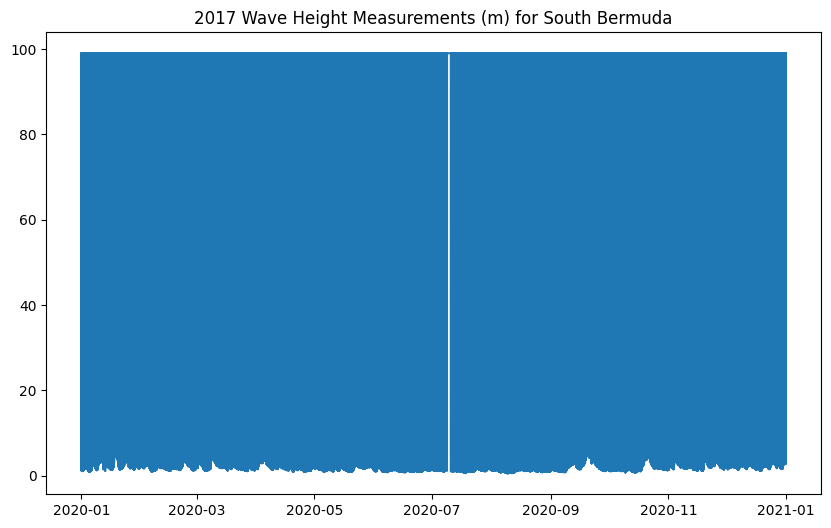

In [283]:
arima_data['WVHT'] = arima_data['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2017 Wave Height Measurements (m) for South Bermuda') # setting up a title
plt.plot(arima_data['WVHT']) # plotting our data

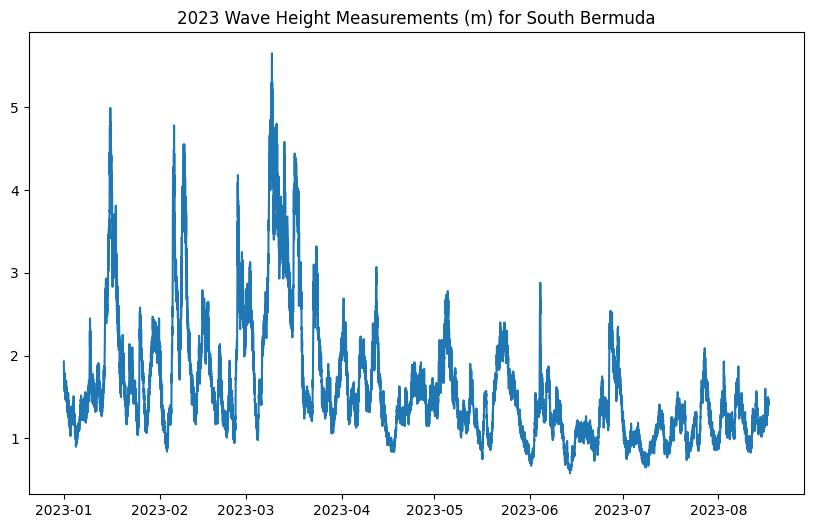

In [284]:
arima_data23['WVHT'] = arima_data23['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2023 Wave Height Measurements (m) for South Bermuda') # setting up a title
plt.plot(arima_data23['WVHT']) # plotting our data


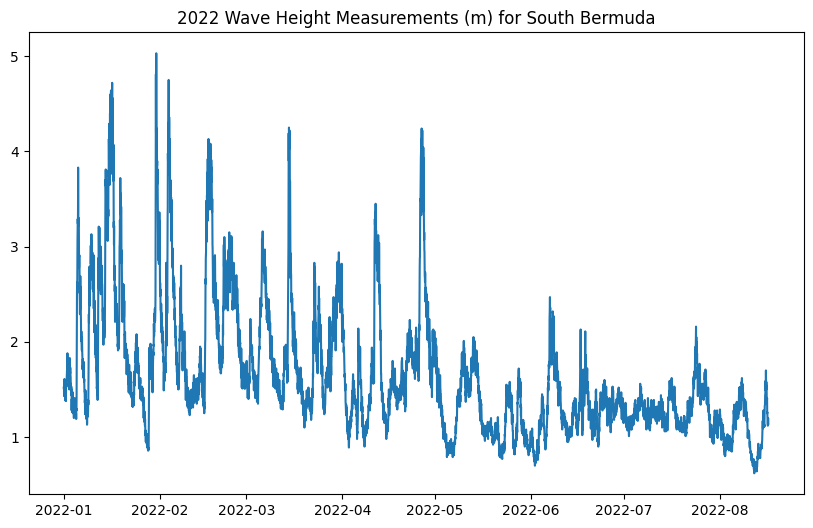

In [285]:
arima_data22['WVHT'] = arima_data22['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2022 Wave Height Measurements (m) for South Bermuda') # setting up a title
plt.plot(arima_data22['WVHT']) # plotting our data

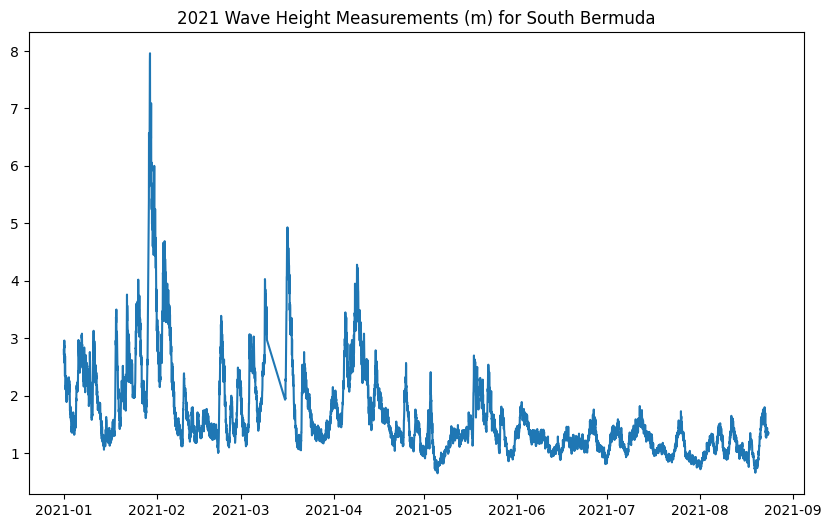

In [286]:
arima_data21['WVHT'] = arima_data21['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2021 Wave Height Measurements (m) for South Bermuda') # setting up a title
plt.plot(arima_data21['WVHT']) # plotting our data

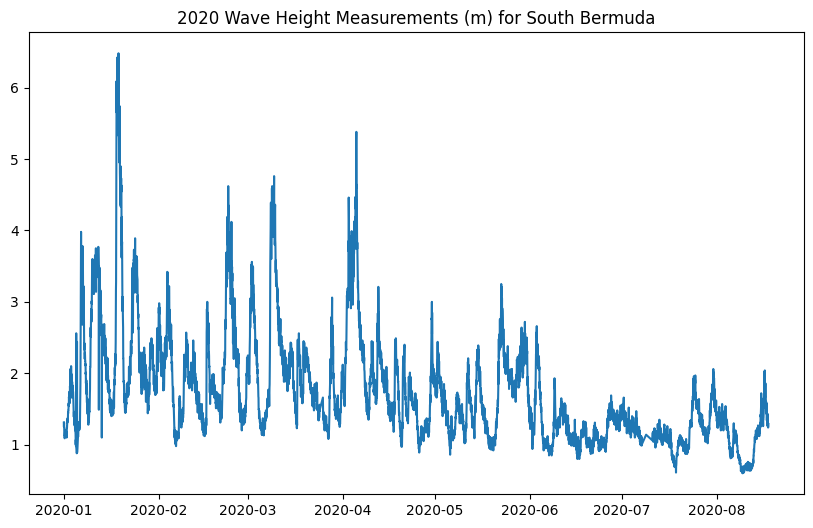

In [287]:
arima_data20['WVHT'] = arima_data20['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2020 Wave Height Measurements (m) for South Bermuda') # setting up a title
plt.plot(arima_data20['WVHT']) # plotting our data

In [291]:
arima_data20

,WVHT
Date,
2020-01-01 00:40:00,1.31
2020-01-01 01:40:00,1.25
2020-01-01 02:40:00,1.31
2020-01-01 03:40:00,1.22
2020-01-01 04:40:00,1.14
...,...
2020-08-17 15:40:00,1.25
2020-08-17 16:40:00,1.31
2020-08-17 17:40:00,1.24


In [129]:
arima_tts = arima_data['WVHT']
arima_train = arima_tts[:int(len(arima_data)*0.8)] # selecting 80% of arima_data for training
arima_test = arima_tts[int(len(arima_data)*0.8):] # selecting the last 20% of data for testing

In [ ]:
print(len(arima_train)) # printing the length of arima_train
print(len(arima_test)) # printing the length of arima_test
print(len(arima_data)) # arima_train + arima_test should equal arima_data

6968
1742
8710


In [ ]:
adf_test = adfuller(arima_data['WVHT']) # performing adf test
print('ADF Statistic: ', adf_test[0]) # printing results
print('P-value: ', adf_test[1])

ADF Statistic:  -10.933254489959989
P-value:  9.702535591500347e-20


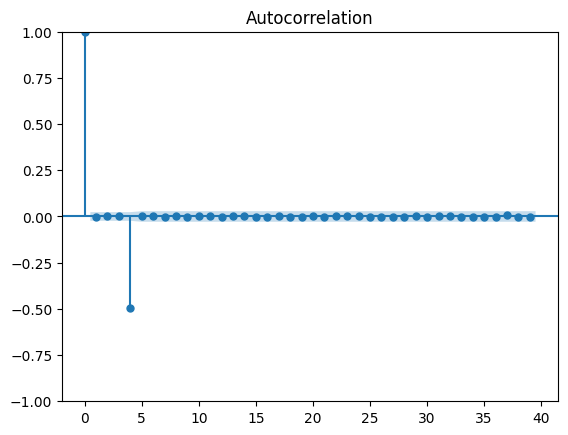

In [ ]:
acf_plot = plot_acf(arima_train.diff().dropna()) # autocorrelation plot using training data

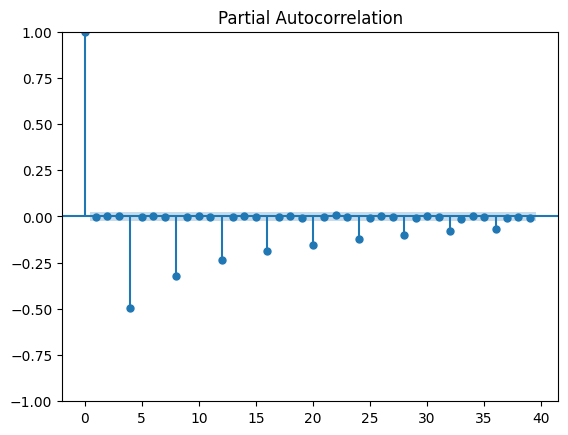

In [ ]:
pacf_plot = plot_pacf(arima_train.diff().dropna()) # partial autocorrelation plot on training data

In [ ]:
import pmdarima as pm # importing the package

auto_arima = pm.auto_arima(arima_train, stepwise = False, seasonal = False) # using auto arima on the training data

auto_arima # printing variable

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)